In [9]:
import numpy as np
import os

data_path = '/home/yigit/Documents/projects/irl_sfm/data/demonstrations/sfm/1_obs_multi_goals/'
out_path = '/home/yigit/phd/yigit_phd_thesis/cnmp/data/sfm/1_obs_multi_goals/'
demonstrations = []
novel_demonstrations = []

for filename in os.listdir(data_path):
    if filename.endswith(".npy"):
        path = os.path.join(data_path, filename)
        demonstrations.append(np.load(path, allow_pickle=True, encoding='latin1'))

novel_data_path = os.path.join(data_path, 'novel/')
for filename in os.listdir(novel_data_path):
    if filename.endswith(".npy"):
        path = os.path.join(novel_data_path, filename)
        novel_demonstrations.append(np.load(path, allow_pickle=True, encoding='latin1'))

num_demos = 8  # len(demonstrations)
num_novel = 1

In [10]:
desired_len = 400 # min_len
x_dim, gamma_dim, y_dim = 2, 2, 2

d_X = np.zeros((num_demos, desired_len, x_dim))
d_Gamma =  np.zeros((num_demos, desired_len, gamma_dim))
d_Y = np.zeros((num_demos, desired_len, y_dim))
n_X = np.zeros((num_novel, desired_len, x_dim))
n_Gamma =  np.zeros((num_novel, desired_len, gamma_dim))
n_Y = np.zeros((num_novel, desired_len, y_dim))

for i, demo in enumerate(demonstrations):
    len_demo = len(demo)
    indices = np.linspace(0, len_demo-1, desired_len, dtype=int)  # <desired_len>-many indices are selected uniformly
    x, gmm, y = np.zeros((desired_len, x_dim)), np.zeros((desired_len, gamma_dim)), np.zeros((desired_len, y_dim))
    for new_ind, old_ind in enumerate(indices):
        x[new_ind] = demo[old_ind][:x_dim]
        gmm[new_ind] = demo[old_ind][x_dim:x_dim+gamma_dim]
        y[new_ind] = demo[old_ind][-y_dim:]
    d_X[i] = x
    d_Gamma[i] = gmm
    d_Y[i] = y

#############    
# novel case
#############

for i, demo in enumerate(novel_demonstrations):
    len_demo = len(demo)
    indices = np.linspace(0, len_demo-1, desired_len, dtype=int)  # <desired_len>-many indices are selected uniformly
    x, gmm, y = np.zeros((desired_len, x_dim)), np.zeros((desired_len, gamma_dim)), np.zeros((desired_len, y_dim))
    for new_ind, old_ind in enumerate(indices):
        x[new_ind] = demo[old_ind][:x_dim]
        gmm[new_ind] = demo[old_ind][x_dim:x_dim+gamma_dim]
        y[new_ind] = demo[old_ind][-y_dim:]
    n_X[i] = x
    n_Gamma[i] = gmm
    n_Y[i] = y

[Text(0, 0.5, 'speed'), Text(0.5, 0, 'step')]

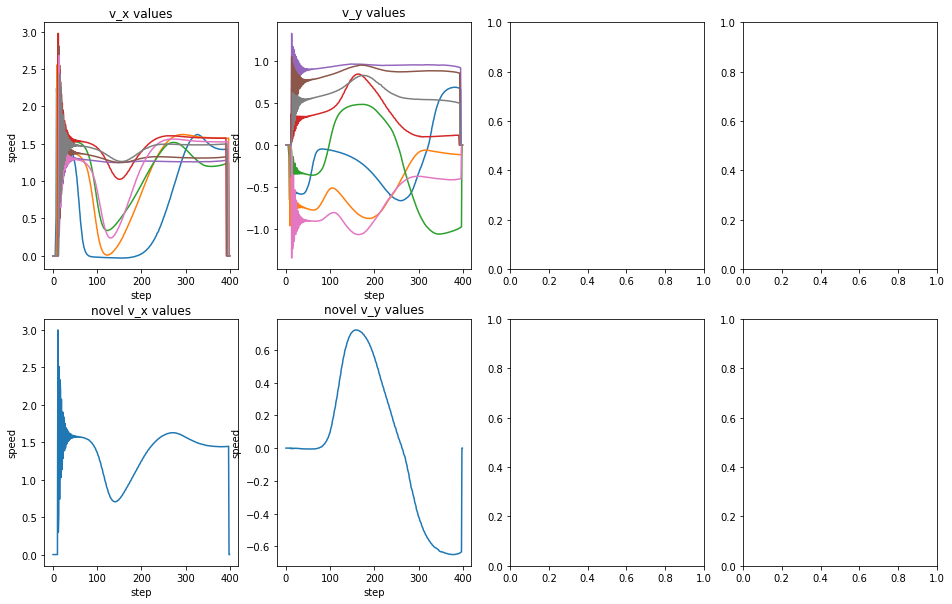

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 10]

fig, axs = plt.subplots(2, 4)
for i in range(num_demos):
    axs[0, 0].plot(range(len(d_Y[i])), d_Y[i][:, 0])  # v_x
axs[0, 0].set_title('v_x values')
axs[0, 0].set(xlabel='step', ylabel='speed')

for i in range(num_demos):
    axs[0, 1].plot(range(len(d_Y[i])), d_Y[i][:, 1])  # v_y
axs[0, 1].set_title('v_y values')
axs[0, 1].set(xlabel='step', ylabel='speed')

axs[1, 0].plot(range(len(n_Y[0])), n_Y[0][:, 0])  # v_x
axs[1, 0].set_title('novel v_x values')
axs[1, 0].set(xlabel='step', ylabel='speed')

axs[1, 1].plot(range(len(n_Y[0])), n_Y[0][:, 1])  # v_y
axs[1, 1].set_title('novel v_y values')
axs[1, 1].set(xlabel='step', ylabel='speed')


In [12]:
num_val = 3

x_train, x_val, y_train, y_val, gamma_train, gamma_val = [], [], [], [], [], []
val_indices = np.sort(np.random.choice(range(num_demos-1), num_val, replace=False))

for i in range(num_demos):
    if i in val_indices:  # validation instance
        print(f'val: {i}')
        x_val.append(d_X[i])
        gamma_val.append(d_Gamma[i])
        y_val.append(d_Y[i])
    else:  # training instance
        print(f'train: {i}')
        x_train.append(d_X[i])
        gamma_train.append(d_Gamma[i])
        y_train.append(d_Y[i])
        
np.save(out_path + 'demonstrations/' + 'd_x.npy', np.array(x_train))
np.save(out_path + 'demonstrations/' + 'd_y.npy', np.array(y_train))
np.save(out_path + 'demonstrations/' + 'd_gamma.npy', np.array(gamma_train))
np.save(out_path + 'demonstrations/' + 'v_d_x.npy', np.array(x_val))
np.save(out_path + 'demonstrations/' + 'v_d_y.npy', np.array(y_val))
np.save(out_path + 'demonstrations/' + 'v_d_gamma.npy', np.array(gamma_val))

#############
# novel case
#############

np.save(out_path + 'novel/' + 'd_x.npy', np.array(n_X))
np.save(out_path + 'novel/' + 'd_y.npy', np.array(n_Y))
np.save(out_path + 'novel/' + 'd_gamma.npy', np.array(n_Gamma))

val: 0
train: 1
train: 2
train: 3
train: 4
val: 5
val: 6
train: 7
